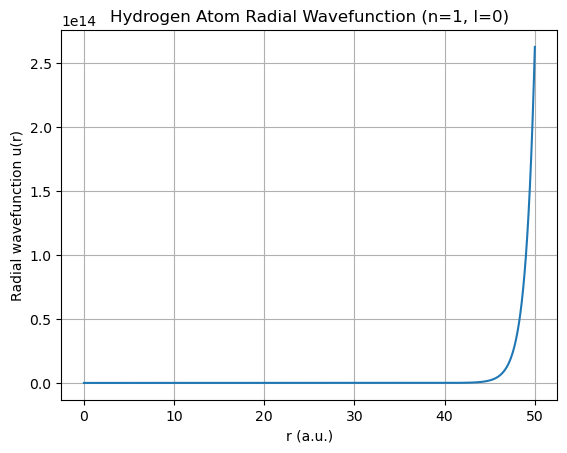

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

# Constants (atomic units: hbar = m_e = e = 1)
Z = 1  # Hydrogen atom
r_min = 1e-5
r_max = 50
num_points = 1000
r = np.linspace(r_min, r_max, num_points)

def schrodinger_radial(r, y, l, E):
    """Radial Schrodinger equation for Hydrogen atom."""
    u, uprime = y
    V = -Z / r + l * (l + 1) / (2 * r**2)
    return [uprime, 2 * (V - E) * u]

def solve_radial(l, E):
    """Solve radial equation for given l and energy E."""
    y0 = [0.0, 1.0]  # u(0)=0, u'(0)=1 (arbitrary normalization)
    sol = solve_ivp(schrodinger_radial, [r_min, r_max], y0, args=(l, E), t_eval=r)
    return sol.t, sol.y[0]

# Example: ground state (n=1, l=0), E = -0.5 a.u.
l = 0
E = -0.5
r_vals, u_vals = solve_radial(l, E)

plt.plot(r_vals, u_vals)
plt.xlabel('r (a.u.)')
plt.ylabel('Radial wavefunction u(r)')
plt.title('Hydrogen Atom Radial Wavefunction (n=1, l=0)')
plt.grid()
plt.show()

